In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
from mcu_chamfer import MCUChamferModel


In [3]:
figure_num = 20**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
lw = np.array([0, -75])
up = np.array([20, 75])
fixed_params = {"height": 100}
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUChamferModel(k=10, c=0.1, figures=figures, params=control_vars, params_names=param_names)

In [4]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rre_median_embedding_vs_params: 0.00034380636135979684


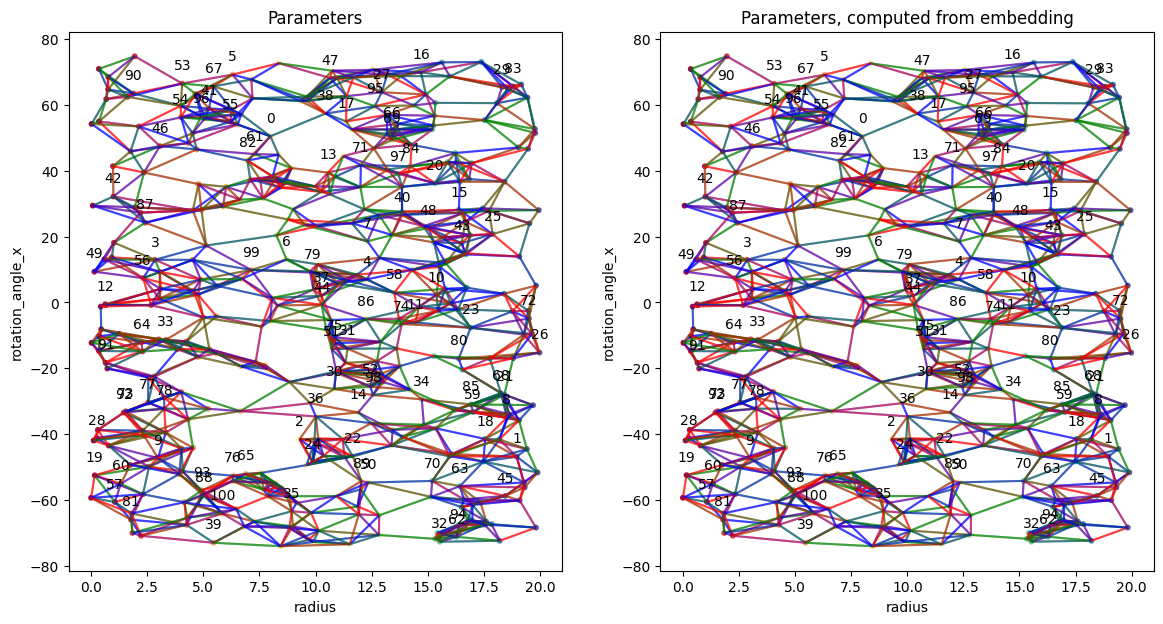

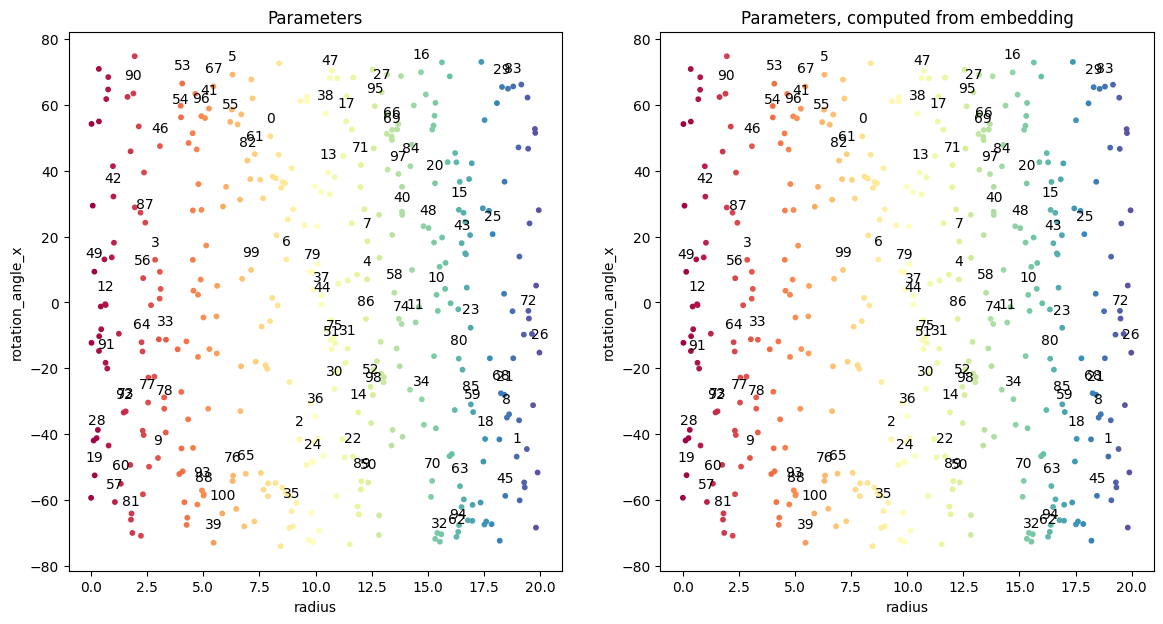

In [5]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [6]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt=200, noise_level=0, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 124 ms , optimization: 0 ms
-----------
x_opt  = [  1.8274658  -60.39534415], x_err = 0.01254366593227124
x_real = [  0.73781357 -61.5757385 ]
Finding neighbors: 126 ms , optimization: 1 ms
-----------
x_opt  = [  2.13491826 -61.30189977], x_err = 0.013885625886418661
x_real = [  1.63898552 -65.2139826 ]
Finding neighbors: 118 ms , optimization: 1 ms
-----------
x_opt  = [  2.16336034 -61.05431641], x_err = 0.010958591584670099
x_real = [  0.58867087 -68.13122405]
Finding neighbors: 118 ms , optimization: 0 ms
-----------
x_opt  = [  1.82227985 -60.33955097], x_err = 0.01273826492362774
x_real = [  0.33836407 -61.77133556]
Finding neighbors: 120 ms , optimization: 0 ms
-----------
x_opt  = [  2.12568019 -60.92632986], x_err = 0.013870459675884973
x_real = [  0.79456423 -66.05855007]
Finding neighbors: 107 ms , optimization: 0 ms
-----------
x_opt  = [  3.00060769 -62.58212036], x_err = 0.013339401197830798
x_real = [ 5.11679799e-02 -7.11913388e+01]
Finding neighbors:

In [7]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt = 200, noise_level=0, pieces_cnt=10, test_data_size=20, same_value=False, baseline=True)

-----------
x_opt  = [  2.22394065 -70.88599418], x_err = 0.03733940728146691
x_real = [  1.80820736 -74.50798414]
-----------
x_opt  = [  1.84322706 -70.02318673], x_err = 0.05656814648584507
x_real = [  0.53530013 -73.90680972]
-----------
x_opt  = [  1.80628859 -64.11039424], x_err = 0.019724577874530483
x_real = [  1.5323445  -62.72210477]
-----------
x_opt  = [  1.84322706 -70.02318673], x_err = 0.032370085047960025
x_real = [  0.9542675  -66.40425236]
-----------
x_opt  = [  1.06526525 -60.63103296], x_err = 0.028954206383619067
x_real = [  0.99493228 -64.71346158]
-----------
x_opt  = [  1.84322706 -70.02318673], x_err = 0.04536250554919798
x_real = [  1.23865065 -70.44632997]
-----------
x_opt  = [  1.80628859 -64.11039424], x_err = 0.0259905727095465
x_real = [  0.60386471 -69.01148046]
-----------
x_opt  = [  1.84322706 -70.02318673], x_err = 0.0537755687655347
x_real = [  0.96275917 -73.09551445]
-----------
x_opt  = [  1.78186844 -65.99048834], x_err = 0.021645738120024696


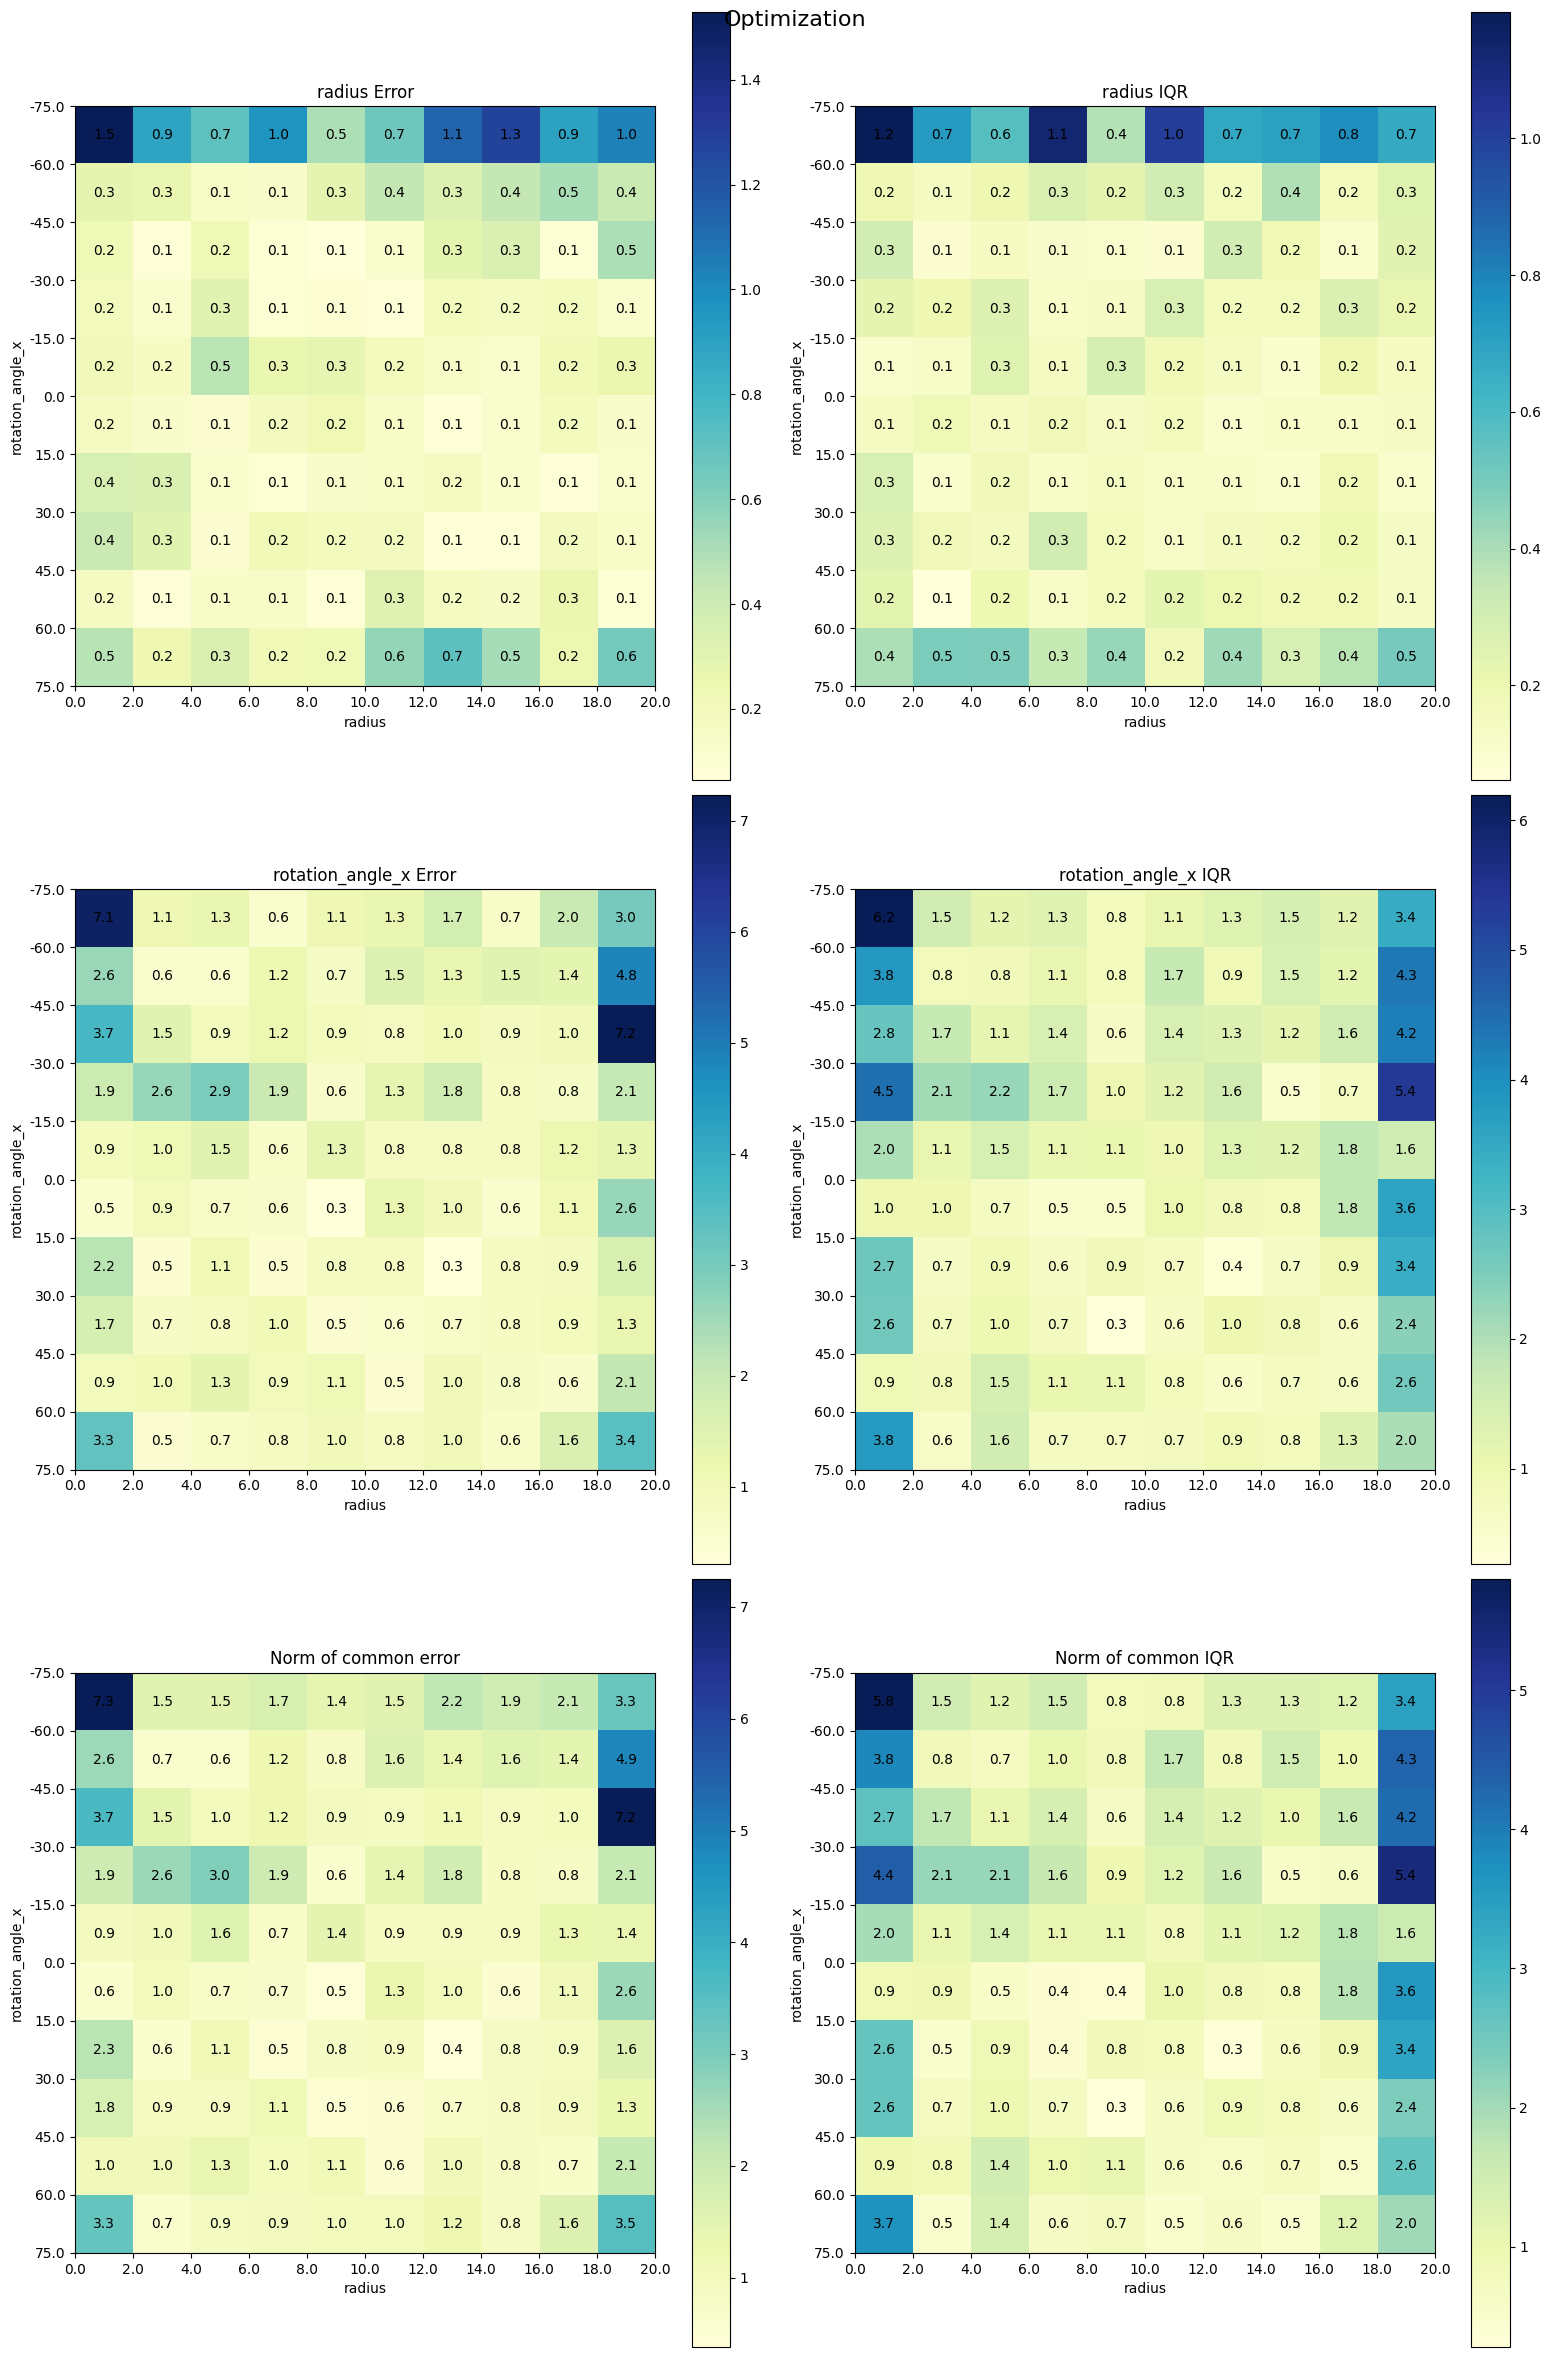

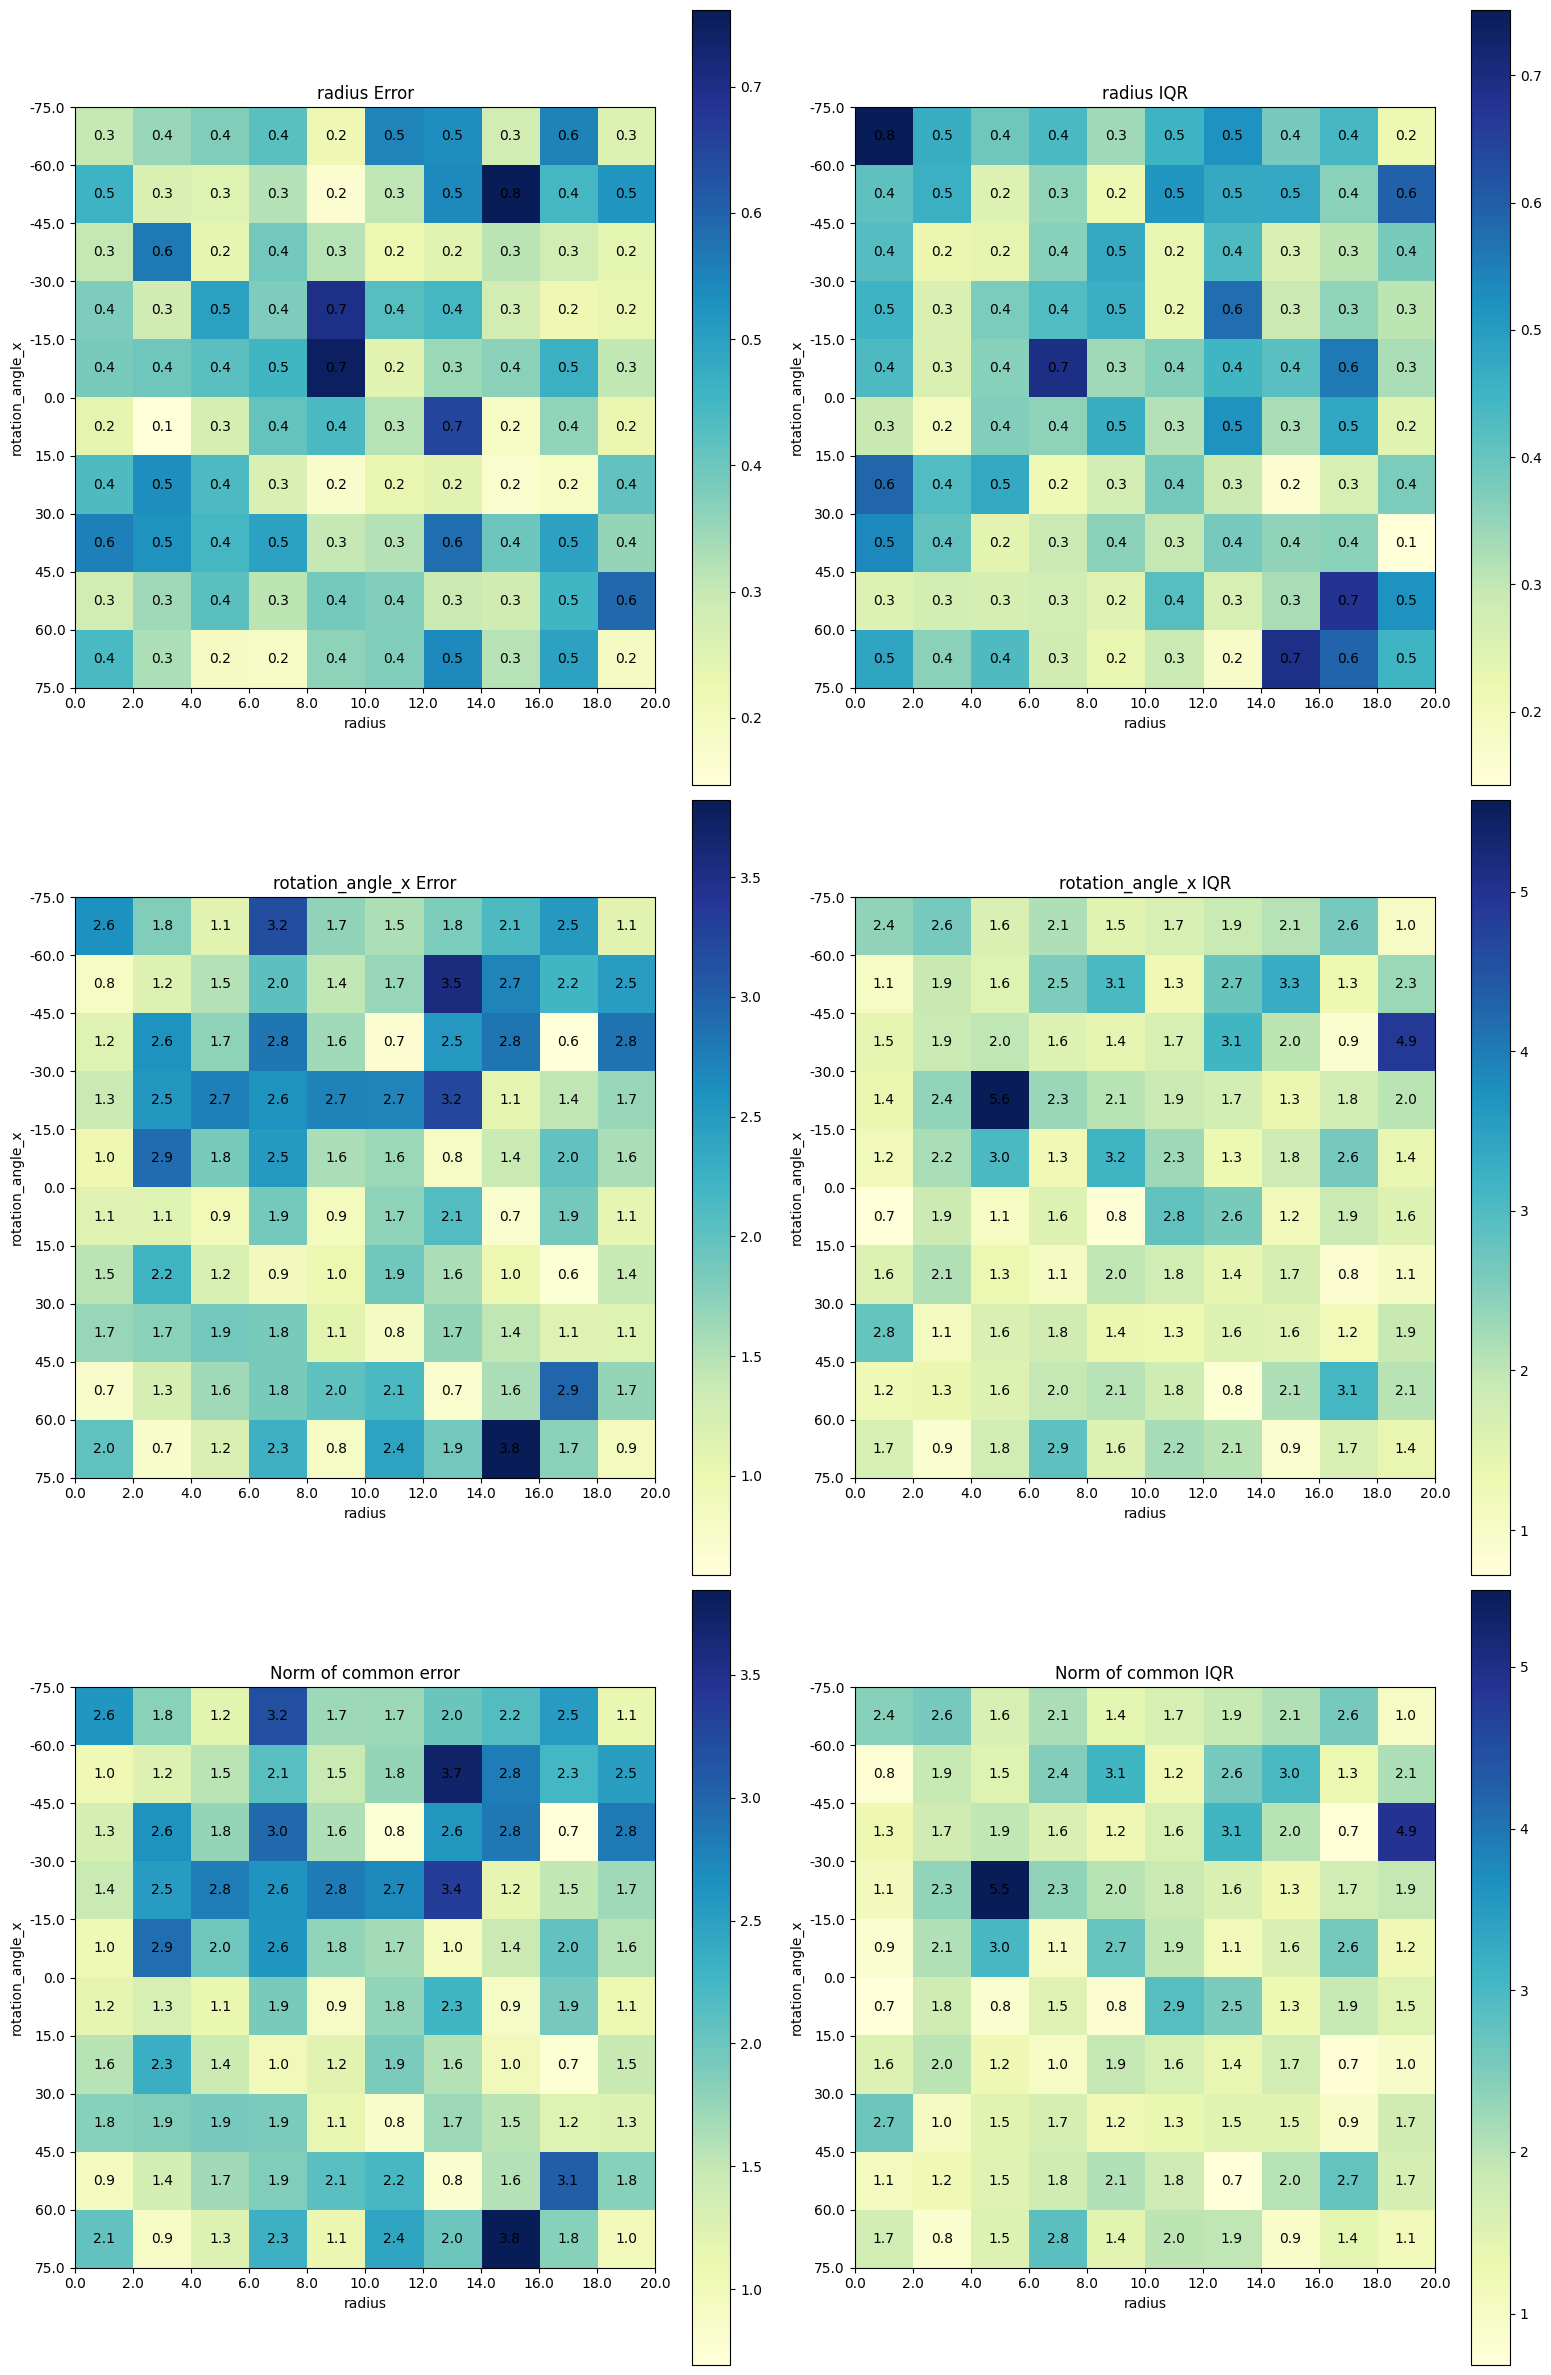

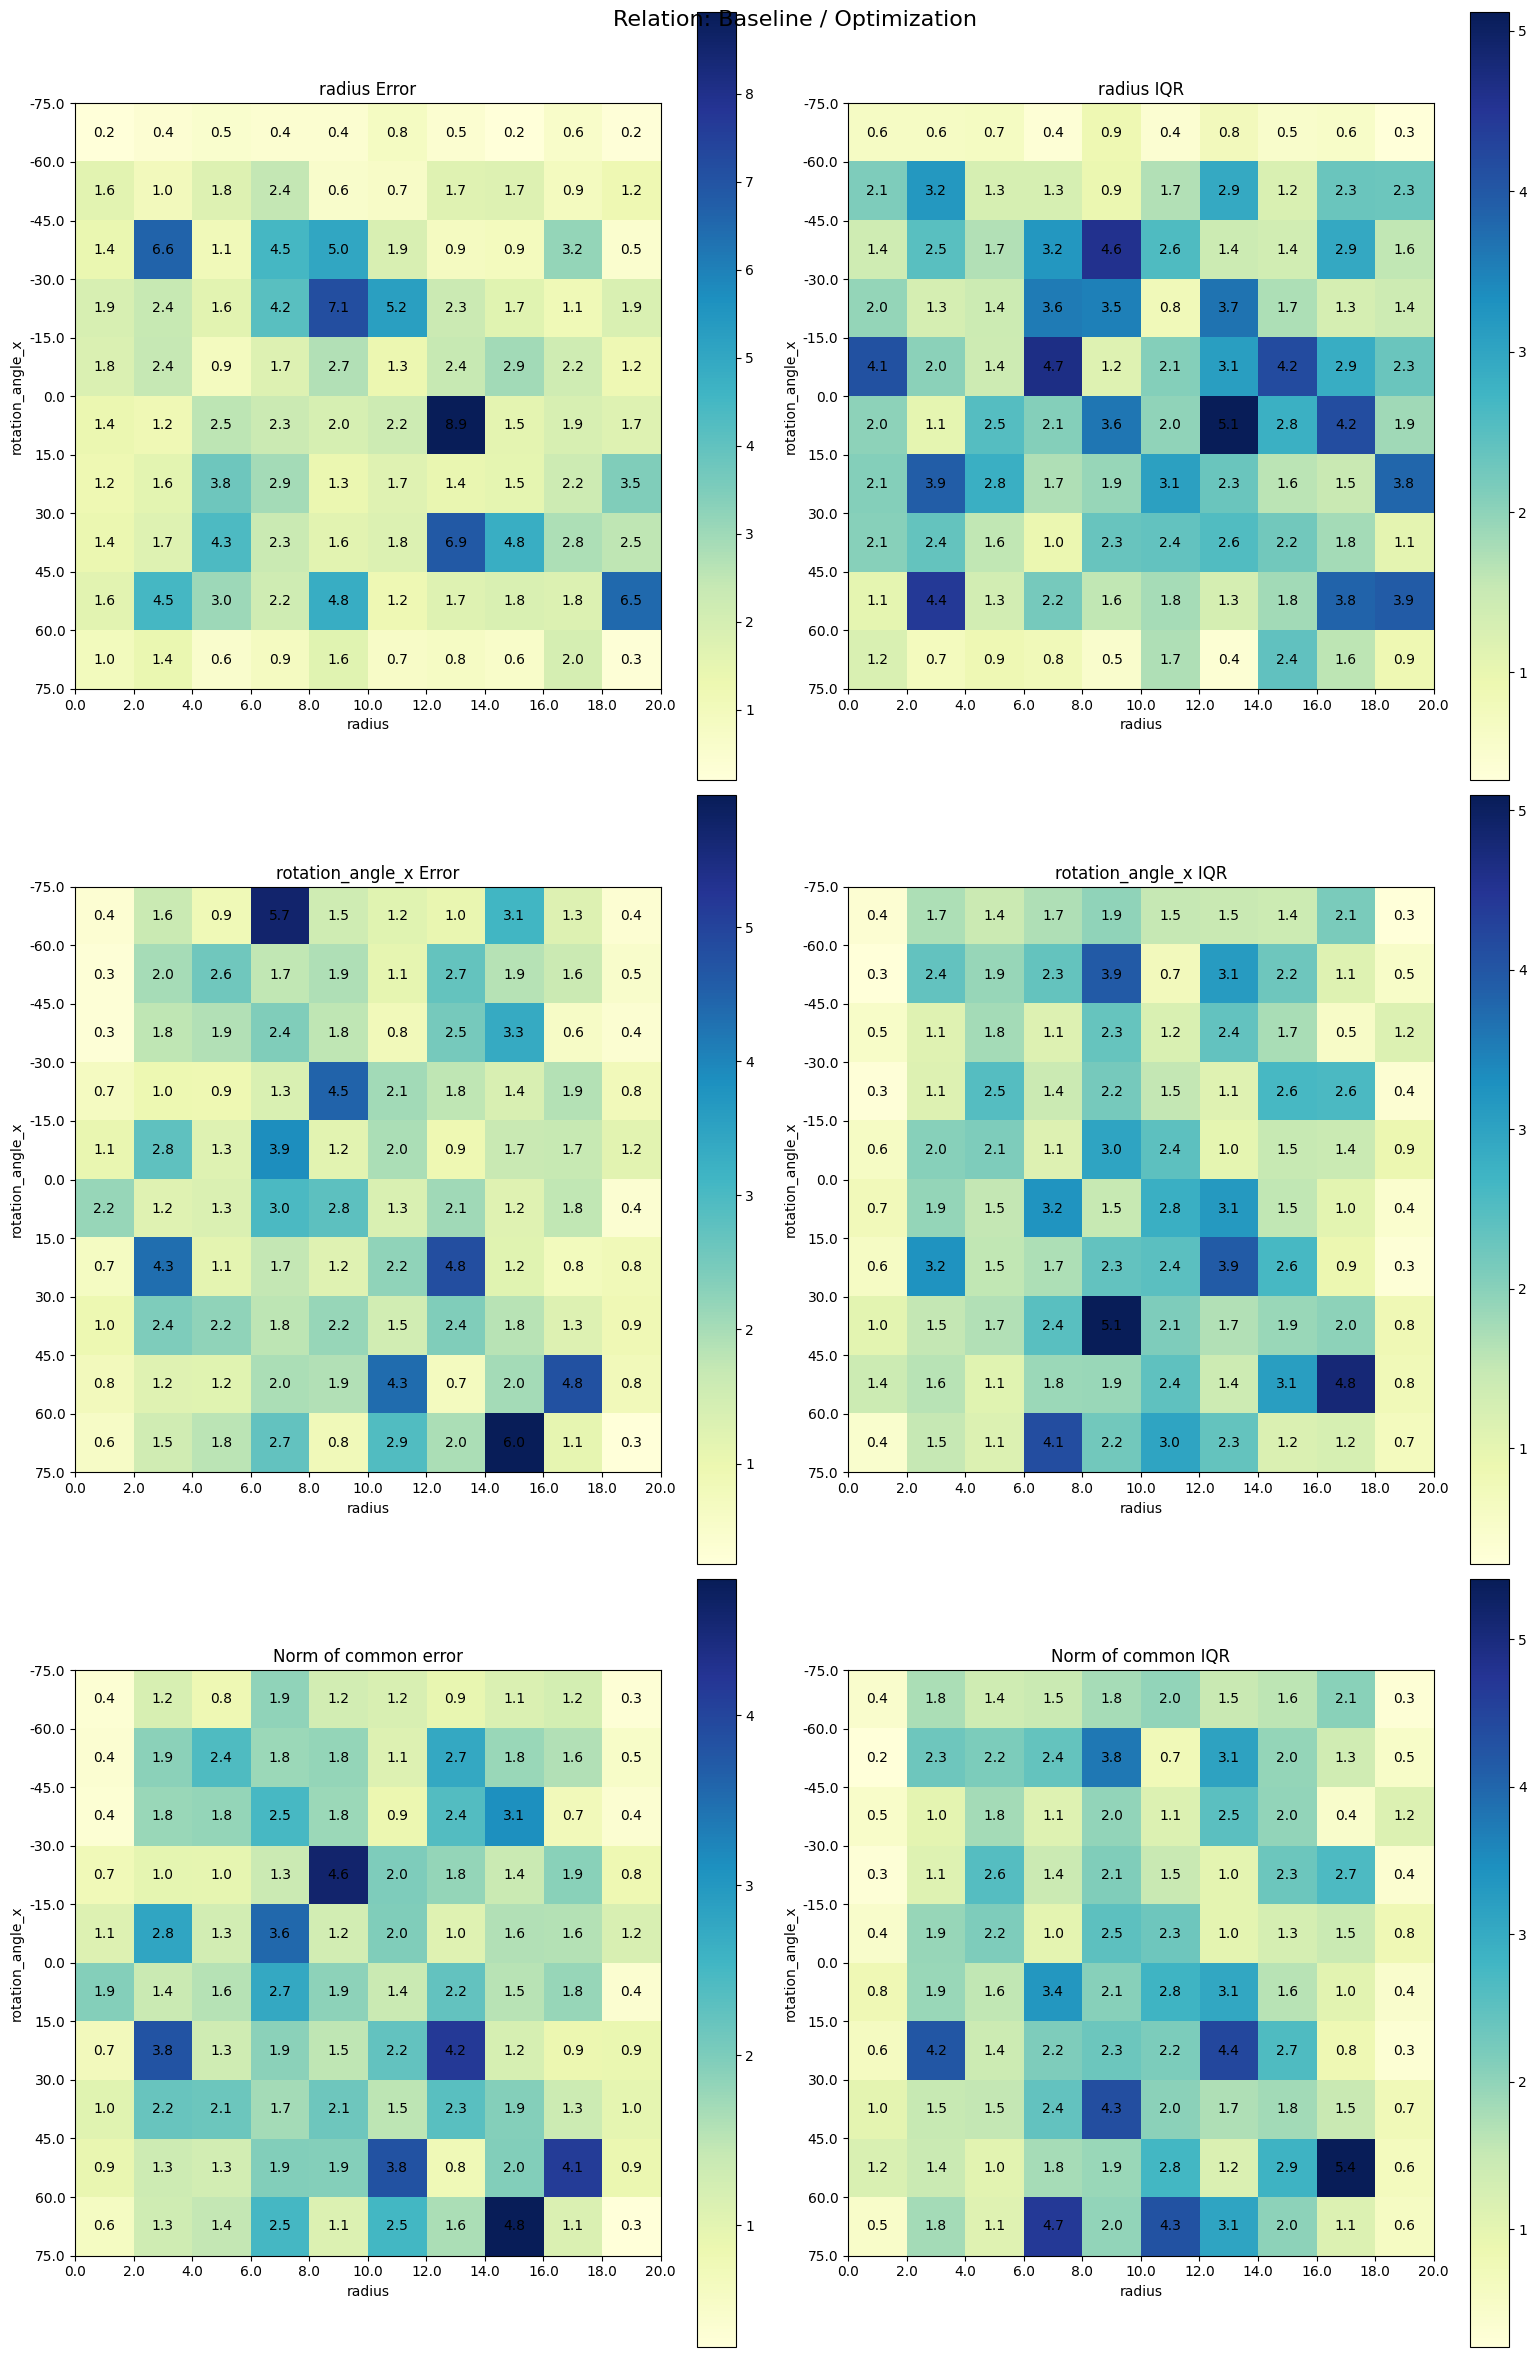

In [13]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/ch_cyl_2d.png", title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/ch_cyl_2d_base.png")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/ch_cyl_2d_rel.png", title="Relation: Baseline / Optimization")

0.35425128662725136 20.076888607388106 -82.53372319355366 72.50224694802317


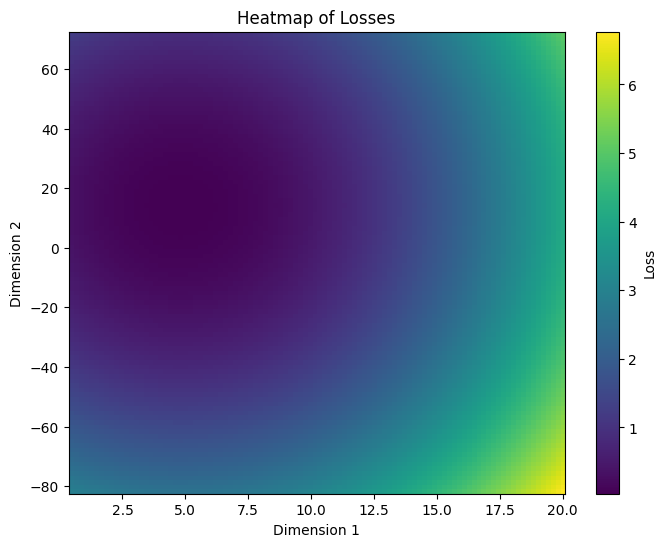

Finding neighbors: 119 ms , optimization: 165 ms
x_opt = [ 4.71533638 14.90627703], x_err = 0.03345443297216101
x_real = [ 3 15]
0.35425128662725136 20.076888607388106 -82.53372319355366 72.50224694802317


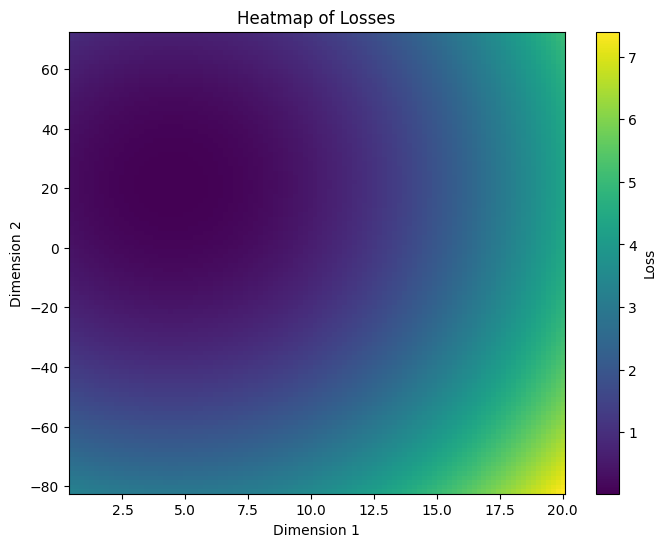

Finding neighbors: 113 ms , optimization: 204 ms
x_opt = [ 4.38894009 21.50021341], x_err = 0.019627818516379906
x_real = [ 4 21]
0.35425128662725136 20.076888607388106 -82.53372319355366 72.50224694802317


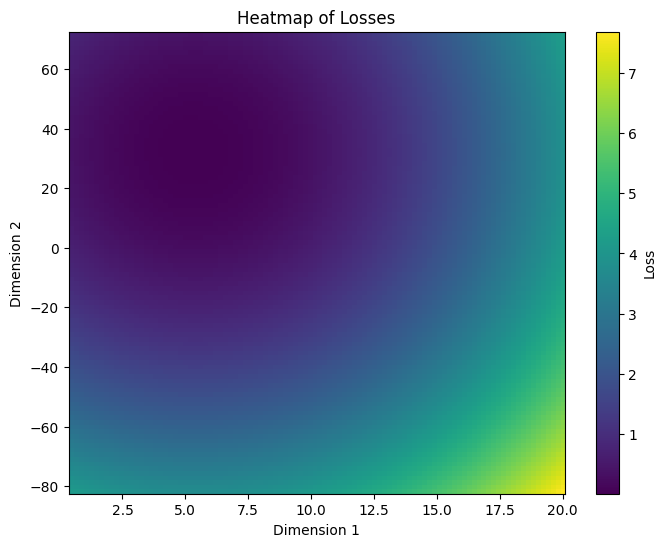

Finding neighbors: 106 ms , optimization: 166 ms
x_opt = [ 5.25279669 32.81964353], x_err = 0.015500071387997813
x_real = [ 5 30]
0.35425128662725136 20.076888607388106 -82.53372319355366 72.50224694802317


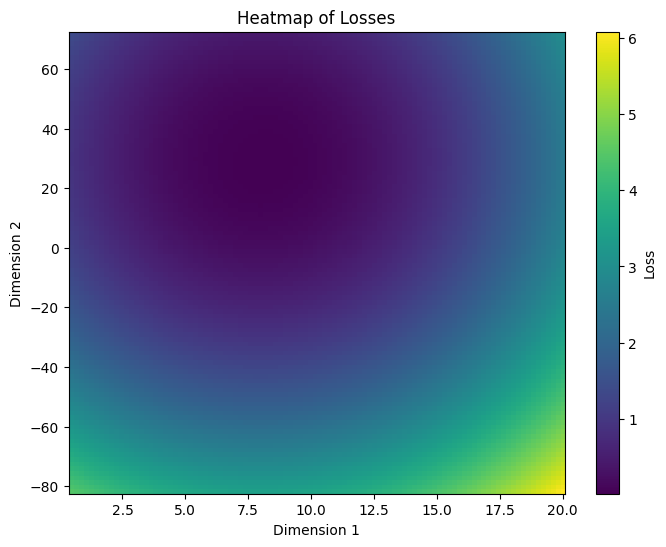

Finding neighbors: 92 ms , optimization: 177 ms
x_opt = [ 8.09808325 28.85693985], x_err = 0.020557744968553112
x_real = [ 8 20]


In [14]:
test_control_vars = np.array([[3, 15], [4, 21], [5, 30], [8, 20]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, cyl_generator.generate_cylinder_points,
                                                           noise_level=noise_level,
                                                           min_num_points=figure_point_cnt)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True, k=5)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")